In [1]:
import seaborn as sns

In [3]:
diamonds = sns.load_dataset("diamonds")

In [4]:
df = diamonds.copy()

In [5]:
df.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [9]:
df["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [13]:
from pandas.api.types import CategoricalDtype


In [14]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [15]:
df.cut = df.cut.astype(CategoricalDtype(ordered=True))

In [18]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

In [19]:
cut_categories = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [20]:
df.cut = df.cut.astype(CategoricalDtype(categories = cut_categories, ordered=True))

In [21]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

<Axes: >

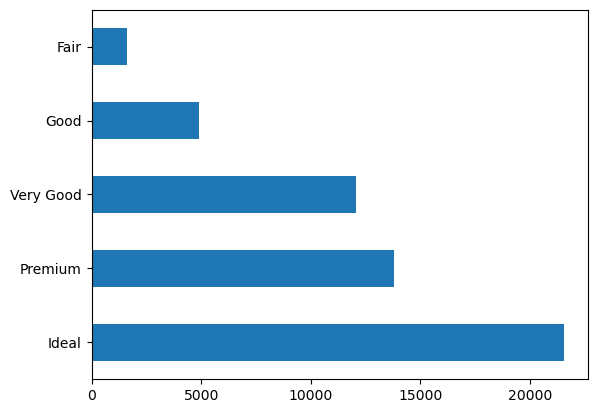

In [22]:
df["cut"].value_counts().plot.barh()

Text(0.5, 1.0, 'The Class frequency of Cut variables')

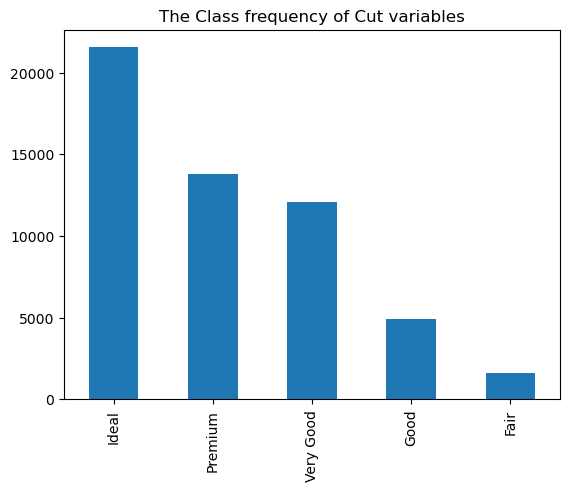

In [26]:
df["cut"].value_counts().plot.bar().set_title("The Class frequency of Cut variables")

<Axes: xlabel='cut'>

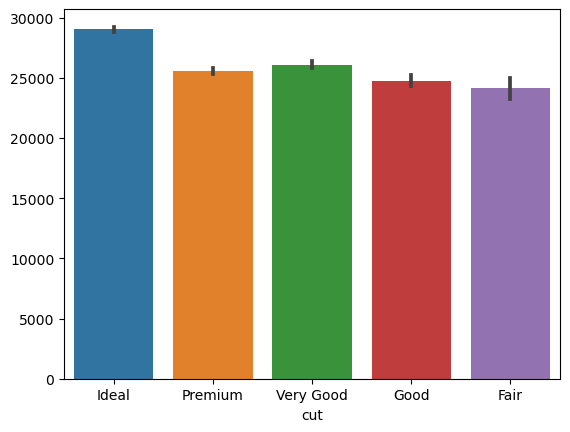

In [27]:
sns.barplot(x="cut",y=df.cut.index, data=df)

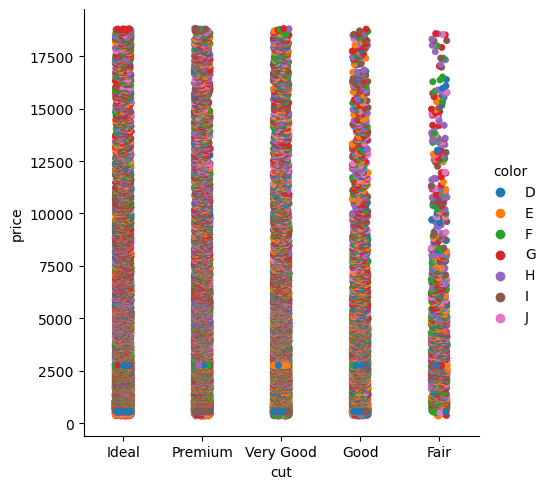

In [33]:
sns.catplot(x="cut", y="price",hue="color", data=df)

<Axes: xlabel='cut', ylabel='price'>

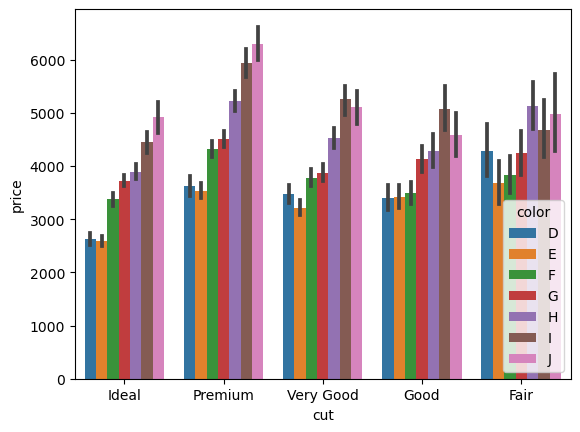

In [32]:
sns.barplot(x="cut",y="price",hue="color", data=df)

<Axes: xlabel='price', ylabel='Count'>

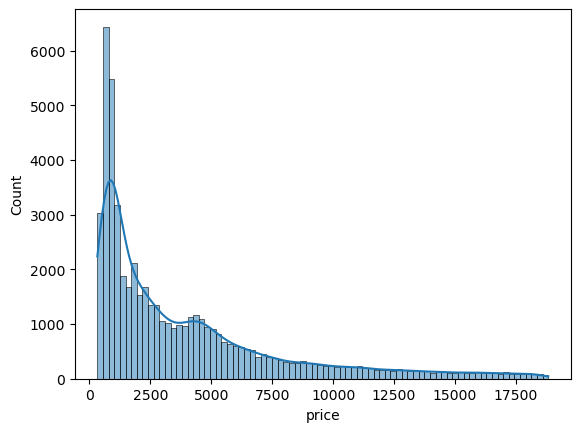

In [45]:
sns.histplot(df.price, kde=True)

In [46]:
?sns.histplot

<Axes: xlabel='price', ylabel='Count'>

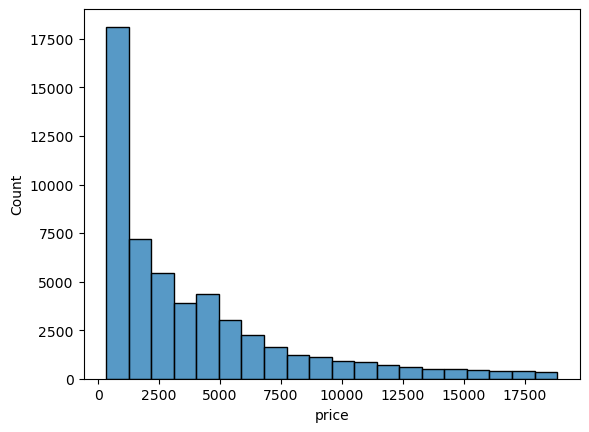

In [50]:
sns.histplot(df.price, bins=20, kde=False )

<Axes: xlabel='price', ylabel='Density'>

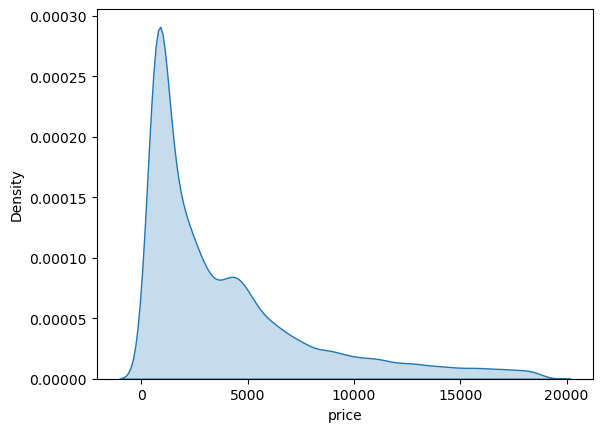

In [54]:
sns.kdeplot(df.price, fill=True)

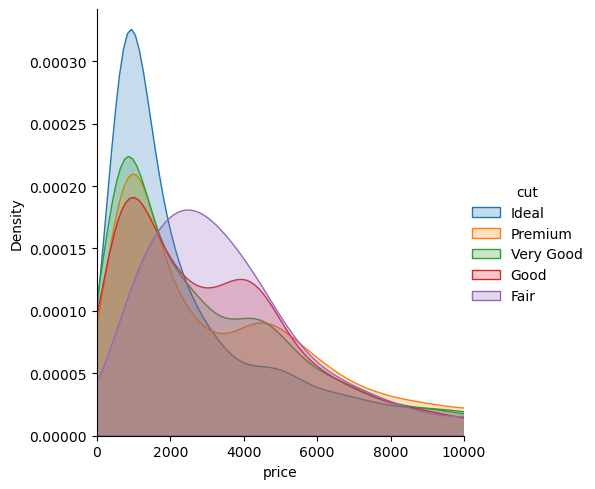

In [56]:
(sns.FacetGrid(df, hue="cut", height=5, xlim=(0,10000)).map(sns.kdeplot,"price",fill=True).add_legend())

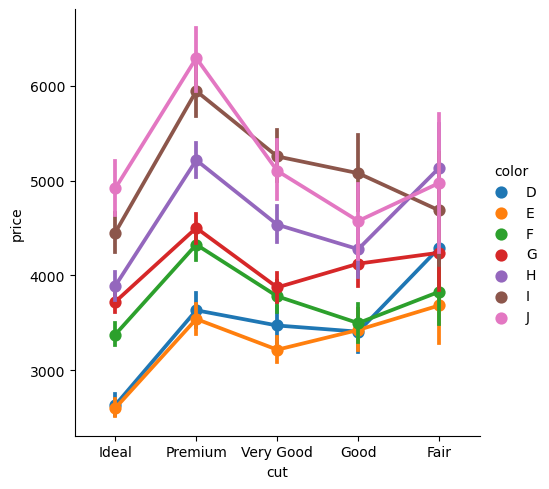

In [57]:
sns.catplot(x="cut",y="price",hue="color",kind="point",data=df)

<Axes: xlabel='cut', ylabel='price'>

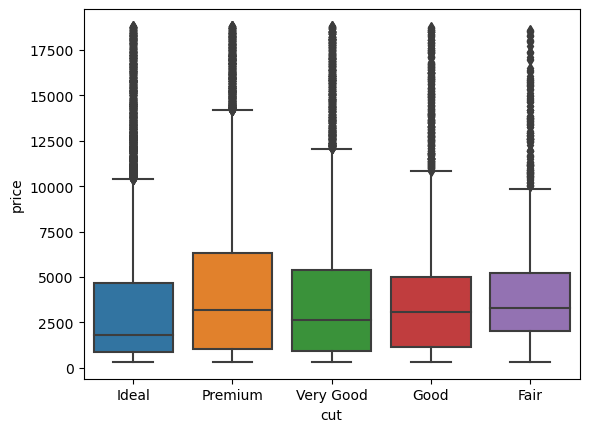

In [58]:
sns.boxplot(x="cut",y="price",data=df)